#### This note book shows basics of LinearRegression with Sklearn using the advertising dataset


#### Load Data

In [33]:
import pandas as pd

In [34]:
data=pd.read_csv('https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv',index_col=0)

#### Data Introduction
* Features:
    * TV: advertising spent on TV (in thousands of dollars)
    * Radio: advertsing spent on Radio
    * Newspaper: advertising spent on Newspaper
* Response:
    * Sales: sales of a single product in a given market (items in thousands)

In [35]:
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


#### Visualizing data using Seborn 

In [36]:
import seaborn as sns
%matplotlib inline

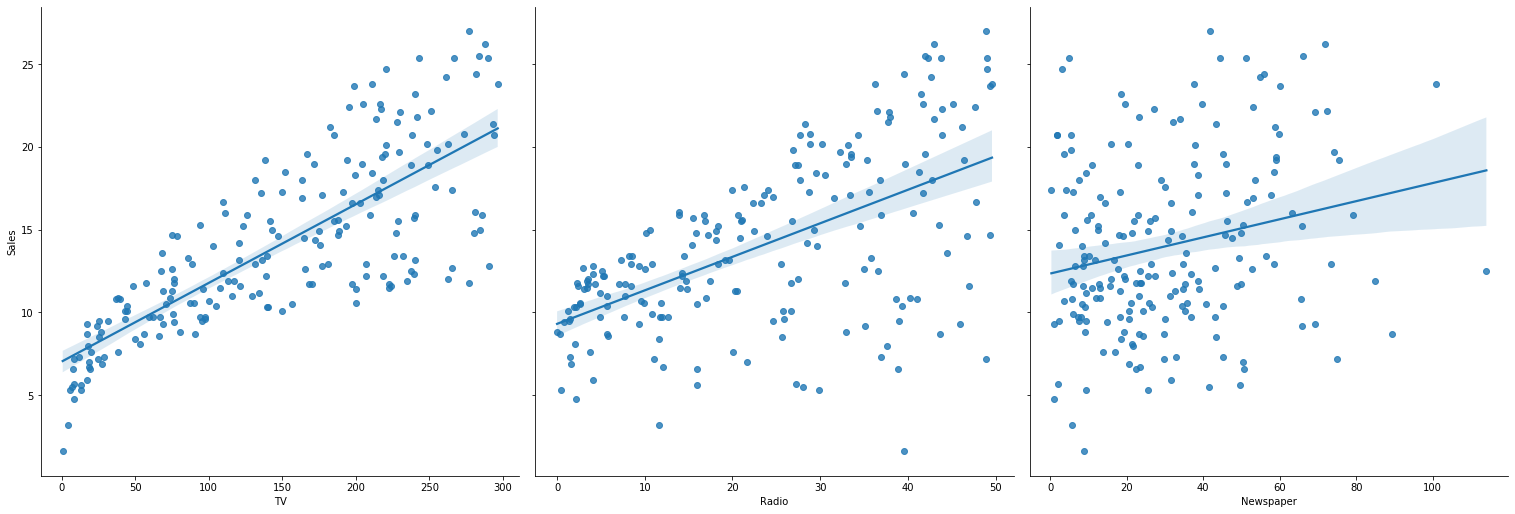

In [37]:
sns.pairplot(data,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',height=7,kind="reg")

#### we can see that there is strong linear relationship between features
and response, which means this dataset is a good candidate for linear regression.

#### Preparing X and Y using panadas
* scikit-learn expects X and y to be Numpy arrays
* however, panadas is built on top of Numpy
* Thus X can be a pandas DataFrame and y can be a pandas series!

In [38]:
X=data[['TV','Radio','Newspaper']]
y=data['Sales']
print(X.head()) 
print(y.head())

      TV  Radio  Newspaper
1  230.1   37.8       69.2
2   44.5   39.3       45.1
3   17.2   45.9       69.3
4  151.5   41.3       58.5
5  180.8   10.8       58.4
1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64


#### Spliting X and y into training and test sets

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [40]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(140, 3)
(60, 3)
(140,)
(60,)


#### Linear regression in scikit_leaarn

In [41]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Model Coefficients

In [42]:
print(linreg.intercept_)
print(linreg.coef_)

3.151526768070653
[ 0.04469599  0.1875657  -0.00032275]


#### we can build the prediction Model


####  _y_ = 3.15 + 0.045xTV + 0.188xRadio - 0.003xNewspaper

#### Making predictions

In [43]:
y_pred=linreg.predict(X_test)

#### Model evaluation metrics for regression

1. Mean Absolute Error(MAE) is the mean of the absolute value of the errors:

In [44]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_pred)

1.2137457736144803

2. Mean Squared Error(MSE) is the mean of the squared errors:

In [45]:
metrics.mean_squared_error(y_test,y_pred)

2.2987166978863782

3. Root Mean Squared Error(RMSE) is the square root of the mean of the squared errors:

In [46]:
import numpy as np
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

1.516151937599388

#### Feature Selection
Newspaper seems to have weak relation with our model. 
Let's try remove it from features and check the RMSE.

In [49]:
X=data[['TV','Radio']]
y=data['Sales']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [50]:
linreg.fit(X_train,y_train)
y_pred=linreg.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

1.5164356880183665

#### Conclusion:
* Advertising spend on TV and Radio helps with total sales. 
* Seems the the RMSE didn't change much. By removing the series 
Newspaper,we are not improving the model accuracy.

#### Resources:
Data School:https://www.youtube.com/watch?v=3ZWuPVWq7p4&list=PL5-da3qGB5ICeMbQuqbbCOQWcS6OYBr5A&index=6
Chapter 3 of Introduction to Statistical Learning: http://www-bcf.usc.edu/~gareth/ISL/        
        